In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pd4ml import Belle

print('imports dones')

imports dones


In [2]:
# print description
Belle.print_description()


    SmartBKG dataset (Belle II - generated events passing downstream selection)

    The goal of this classification problem is to identify generated events that pass a selection already before the expensive detector simulation and reconstruction.

    Original dataset and additional information: https://github.com/kahn-jms/belle-selective-mc-dataset

    ----------------------------------
    Dataset shape:

    Two sets of input data:
    - first set with shape:
        - 280000 belle collider events
        - 100 particles (zero padded)
        - 9 features ('prodTime', 'energy', 'x', 'y', 'z', 'px', 'py', 'pz', 'PID')
            - note: PID corresponding to a unique PDG particle ID, but mapped to a continous space

    - second set with shape:
        - 280000 belle collider events
        - 100 indices of mother particles (adjacency matrix for creating a graph of the event)
            - note: these are -1 padded
    ----------------------------------
    Label:
    event passes

In [3]:
# load training and testing set
X_train, y_train = Belle.load('train', path = '../datasets')
X_test, y_test = Belle.load('test', path = '../datasets')

In [4]:
# checking basic content

print(len(X_train))
print(len(X_test))

print(X_train[0].shape)
print(X_train[1].shape)

print(y_train.shape)
print(y_test.shape)

2
2
(280000, 100, 9)
(280000, 100)
(280000,)
(120000,)


# some basic plots

In [5]:
label_list = ['prodTime', 'energy', 'x', 'y', 'z', 'px', 'py', 'pz', 'PID']

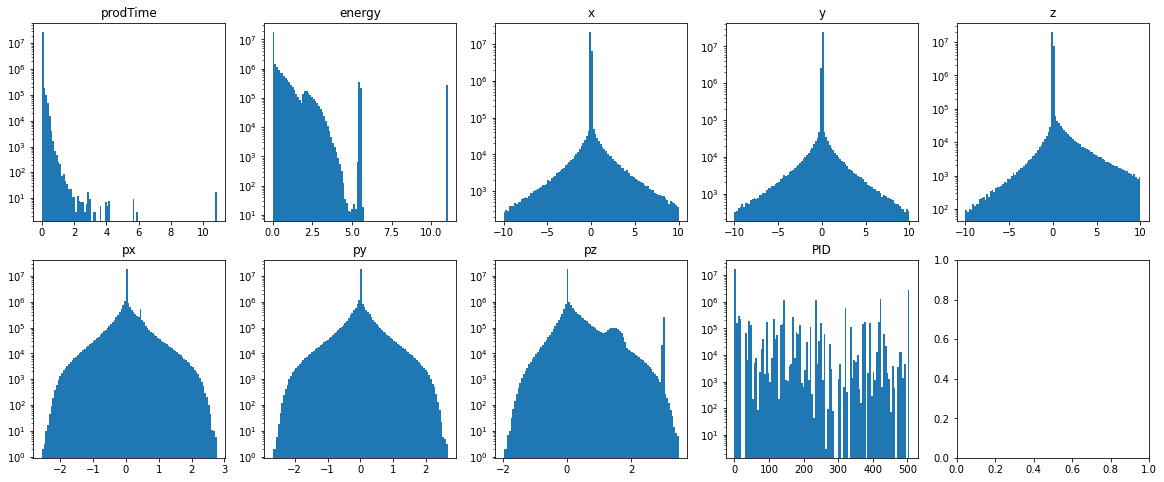

In [6]:
# the features - zeropadded
X = X_train[0]

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
for i, (name, ax) in enumerate(zip(label_list, np.array(axs).ravel())):
    ax.hist(X[:,:,i].ravel(), bins=100)
    ax.set_title(name)
    ax.set_yscale("log")

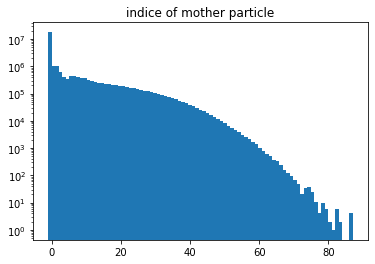

In [7]:
# the adjecency matrix - (-1)-padded
X = X_train[1]

plt.clf()
plt.hist(X.ravel(), bins=87)
plt.title('indice of mother particle')
plt.yscale('log')
plt.show()

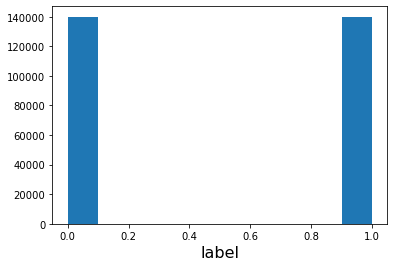

In [8]:
# labels
    
plt.clf()
plt.hist(y_train, bins=10)
plt.xlabel('label', fontsize=16)
plt.show()